In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_squared_error as mse, r2_score as r2, mean_absolute_error as mae
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

sns.set()
matplotlib.rcParams.update({'font.size': 14})

In [2]:
# Importing the CSV file
test_path_data='test.csv'
train_path_data='train.csv'


In [3]:
# Read and observe the data table 
test_df=pd.read_csv(test_path_data)
train_df=pd.read_csv(train_path_data)
train_df.head().T

,0,1,2,3,4
Id,11809,3013,8215,2352,13866
DistrictId,27,22,1,1,94
Rooms,3.0,1.0,3.0,1.0,2.0
Square,115.027311,39.832524,78.342215,40.409907,64.285067
LifeSquare,NaN,23.169223,47.671972,NaN,38.562517
KitchenSquare,10.0,8.0,10.0,1.0,9.0
Floor,4,7,2,10,16
HouseFloor,10.0,8.0,17.0,22.0,16.0
HouseYear,2014,1966,1988,1977,1972
Ecology_1,0.075424,0.118537,0.025609,0.007122,0.282798


In [4]:
# Identify the spread of the data set
train_df.shape, test_df.shape


((10000, 20), (5000, 19))

In [5]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

(None, None)

In [6]:
train_df=train_df.drop(['Healthcare_1'], axis=1)


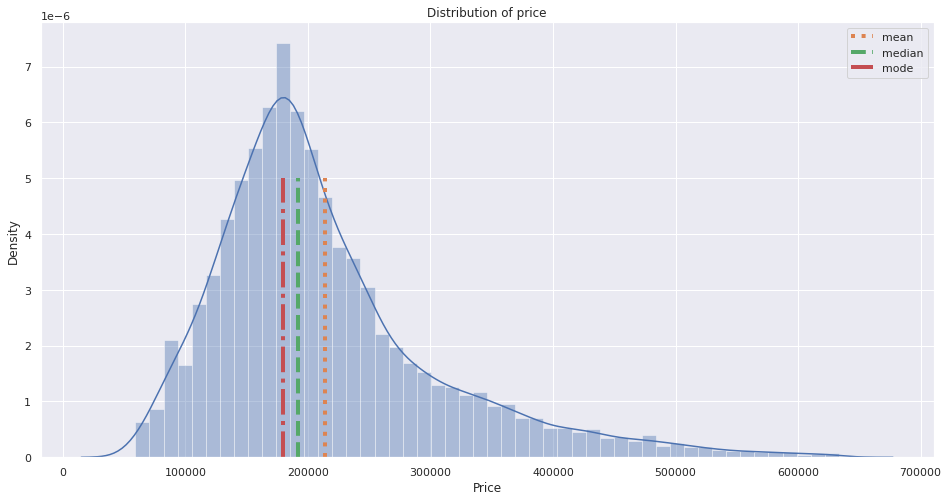

In [7]:
#distribution of target var
target_bins = train_df['Price'] // 10000 * 10000
target_mean = round(train_df['Price'].mean(), 2)
target_median = train_df['Price'].median()
target_mode = target_bins.mode()[0]

plt.figure(figsize = (16, 8))

sns.distplot(train_df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

In [8]:
train_df.describe()
#see thant we need to check the data anomalies and outliers in rooms, square, lifesquare, kitchensquare, housefloor, houseyear. 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


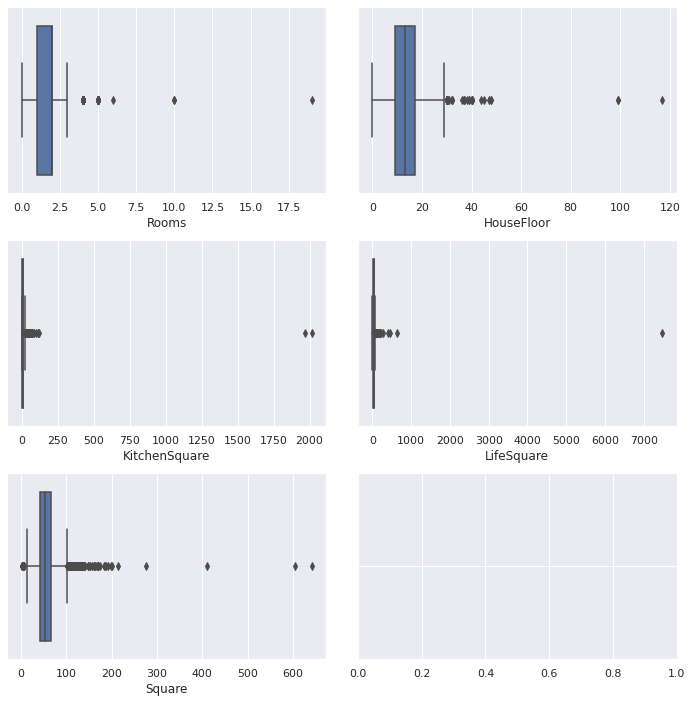

In [9]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, 
                         sharey = True,
                         figsize=(12, 12)
                        )

feature_names = train_df[['Rooms', 'HouseFloor', 'KitchenSquare', 'LifeSquare', 'Square']].columns.tolist()

for feature, ax in zip(feature_names, axes.flatten()):
    ax.plot(ax=axes, label=feature)
    sns.boxplot(x=feature, data=train_df, ax=ax)

fig.subplots_adjust(hspace=0.25, wspace=0.1)


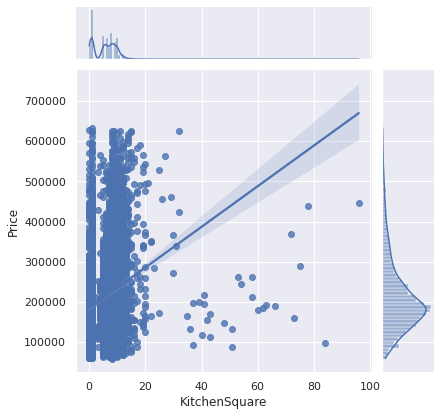

In [10]:
df_temp=train_df.loc[train_df['KitchenSquare']<110]
sns.jointplot(df_temp['KitchenSquare'], df_temp['Price'], kind='reg')

# the values lees than 3 and more then 25 are anomalies

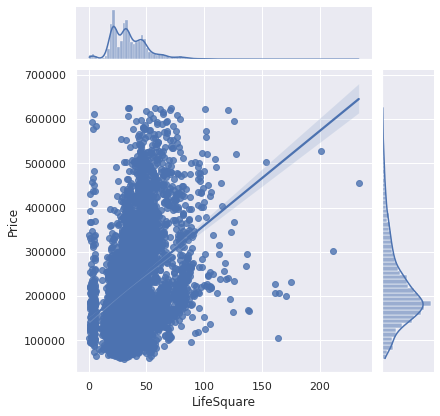

In [11]:
df_temp=train_df.loc[train_df['LifeSquare']<250]
sns.jointplot(df_temp['LifeSquare'], df_temp['Price'], kind='reg')
# the values lees than 12.5 and more then 100 are anomalies

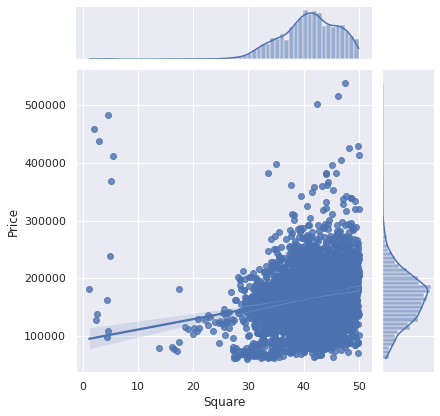

In [12]:
df_temp=train_df.loc[train_df['Square']<50]
sns.jointplot(df_temp['Square'], df_temp['Price'], kind='reg')
# the values lees than 20 are anomalies

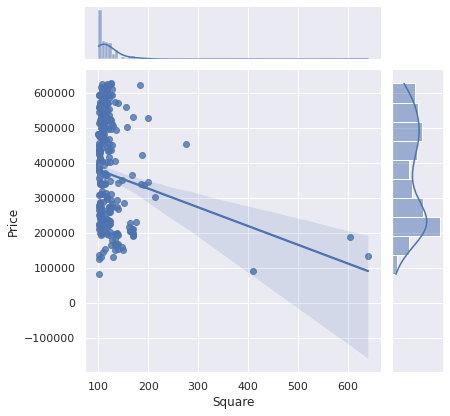

In [13]:
df_temp=train_df.loc[train_df['Square']>100]
sns.jointplot(df_temp['Square'], df_temp['Price'], kind='reg')
# the values more then 200 are anomalies

In [14]:
def num_val_counts(dataset):

  print('Ecology_1' + ' ' + str(train_df['Ecology_1'].value_counts().size))
  print('Ecology_2' + ' ' + str(train_df['Ecology_2'].value_counts().size))
  print('Ecology_3' + ' ' + str(train_df['Ecology_3'].value_counts().size))
  print('Social_1' + ' ' + str(train_df['Social_1'].value_counts().size))
  print('Social_2' + ' ' + str(train_df['Social_2'].value_counts().size))
  print('Social_3' + ' ' + str(train_df['Social_3'].value_counts().size))
  print('Helthcare_2' + ' ' + str(train_df['Helthcare_2'].value_counts().size))
  print('Shops_1' + ' ' + str(train_df['Shops_1'].value_counts().size))
  print('Shops_2' + ' ' + str(train_df['Shops_2'].value_counts().size))

num_val_counts(train_df)

#see that Ecology_2, Ecology_3, Shops_2 can reformate into binary .


Ecology_1 129
Ecology_2 2
Ecology_3 2
Social_1 51
Social_2 142
Social_3 30
Helthcare_2 7
Shops_1 16
Shops_2 2


In [15]:
def prepare_dataset(dataset):
  #rename columns with lower case
  dataset.columns=dataset.columns.str.lower()
  
  # Check for data duplications
  dataset.duplicated().sum()

  #formating into binary
  dataset['ecology_2'].replace({'A':0, 'B':1}, inplace=True)
  dataset['ecology_3'].replace({'A':0, 'B':1}, inplace=True)
  dataset['shops_2'].replace({'A':0, 'B':1}, inplace=True)

  #fillna
  dataset['lifesquare']=dataset['lifesquare'].fillna(dataset['square']-dataset['kitchensquare'])

  #working with anomalies ant outlist
  dataset['housefloor']=dataset['housefloor'].astype(int)
  dataset.loc[dataset['housefloor']>25, 'housefloor'] = dataset['housefloor'].mode()[0]
  dataset.loc[dataset['housefloor']<1, 'housefloor']=1
  dataset.loc[dataset['floor']>dataset['housefloor'], 'floor']=dataset['housefloor'].median()

  dataset.loc[dataset['houseyear']>2022, 'houseyear']=2022

  dataset.loc[(dataset['rooms']>5) | (dataset['rooms']<1), 'rooms'] = dataset['rooms'].mode()[0]
  
  dataset.loc[dataset['kitchensquare']>25, 'kitchensquare'] = 25
  dataset.loc[dataset['kitchensquare']<3, 'kitchensquare'] = 3
  
  dataset.loc[dataset['lifesquare']>100, 'lifesquare'] = 100
  dataset.loc[dataset['lifesquare']<12.5, 'lifesquare'] = 12.5

  dataset.loc[dataset['square']>200, 'square'] = 200
  dataset.loc[dataset['square']<20, 'square'] = 20





In [16]:
prepare_dataset(train_df)


In [17]:
train_df.describe()

,id,districtid,rooms,square,lifesquare,kitchensquare,floor,housefloor,houseyear,ecology_1,ecology_2,ecology_3,social_1,social_2,social_3,helthcare_2,shops_1,shops_2,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.888400,56.223340,40.780014,6.466900,8.904800,12.516600,1984.872800,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1.319500,4.231300,0.917500,214138.857399
std,4859.01902,43.587592,0.811056,19.179218,18.997688,3.280149,4.829666,6.335072,18.417132,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,1.000000,20.000000,12.500000,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.494155,3.000000,5.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,1.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,37.040829,6.000000,9.000000,13.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,1.000000,3.000000,1.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,49.823229,9.000000,13.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,2.000000,6.000000,1.000000,249135.462171
max,16798.00000,209.000000,5.000000,200.000000,100.000000,25.000000,25.000000,25.000000,2022.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000,633233.466570


In [18]:
from pandas.io.sql import read_sql_table
def put_new_features(df):

      
    df['value_year']=0
   
    df.loc[df['houseyear']<=1960, 'value_year']=10
    df.loc[(df['houseyear']>1960)&(df['houseyear']<=1970), 'value_year']=9
    df.loc[(df['houseyear']>1970)&(df['houseyear']<=1980), 'value_year']=8
    df.loc[(df['houseyear']>1980)&(df['houseyear']<=1985), 'value_year']=7
    df.loc[(df['houseyear']>1985)&(df['houseyear']<=1990), 'value_year']=6
    df.loc[(df['houseyear']>1990)&(df['houseyear']<=1995), 'value_year']=5
    df.loc[(df['houseyear']>1995)&(df['houseyear']<=2000), 'value_year']=4
    df.loc[(df['houseyear']>2000)&(df['houseyear']<=2005), 'value_year']=3
    df.loc[(df['houseyear']>2005)&(df['houseyear']<=2010), 'value_year']=2
    df.loc[(df['houseyear']>2010)&(df['houseyear']<=datetime.now().year), 'value_year']=1

    
    df['fl_to_housefloor']=df['housefloor']/df['floor']

    df['value_floor']=1
    df.loc[(df['fl_to_housefloor']==df['housefloor']) | (df['fl_to_housefloor']==1) | (df['fl_to_housefloor']<0.2), 'value_floor']=0

    districtpopularity=df['districtid'].value_counts().reset_index().rename(columns={'index':'districtid', 'districtid':'districtpopularity'})
    d_temp=df.merge(districtpopularity, on='districtid', how='left')
    df['districtpopularity']=d_temp['districtpopularity']
    df['districtpopularity'].fillna(df['districtpopularity'].median(), inplace=True)
  

In [19]:
put_new_features(train_df)

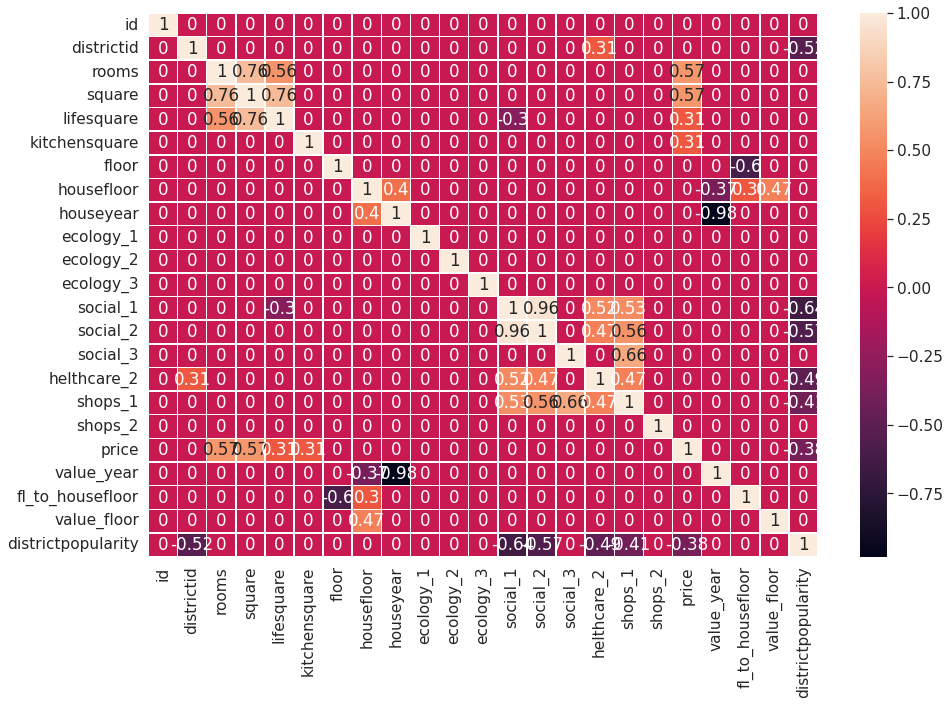

In [20]:
#find correlation between features
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

cm=train_df.corr()
cm=np.round(cm, 2)
cm[np.abs(cm)<0.3]=0

sns.heatmap(cm, annot=True, linewidth=0.5)
plt.show()

#unexpected correlation districtid-helthcare_2 and social_1-price

In [21]:
def evaluate_preds(true_values, pred_values, save=False):
     
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
         
    
   

In [22]:
train_df.columns.to_list()

['id',
 'districtid',
 'rooms',
 'square',
 'lifesquare',
 'kitchensquare',
 'floor',
 'housefloor',
 'houseyear',
 'ecology_1',
 'ecology_2',
 'ecology_3',
 'social_1',
 'social_2',
 'social_3',
 'helthcare_2',
 'shops_1',
 'shops_2',
 'price',
 'value_year',
 'fl_to_housefloor',
 'value_floor',
 'districtpopularity']

In [23]:
#choose features for model
f_names=['rooms', 'square', 'lifesquare', 'kitchensquare', 'floor', 'housefloor', 'ecology_1', 'ecology_2', 'ecology_3',
 'social_1', 'social_2', 'social_3', 'helthcare_2', 'shops_1', 'shops_2', 'districtpopularity', 'value_year', 'value_floor']

f_target= 'price'

In [24]:
#split df
x=train_df[f_names]
y=train_df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=42)

In [25]:
test_df=pd.read_csv(test_path_data)
test_df=test_df.drop(['Healthcare_1'], axis=1)

In [26]:
prepare_dataset(test_df)


In [27]:
put_new_features(test_df)

In [28]:
test_df.describe()

,id,districtid,rooms,square,lifesquare,kitchensquare,floor,housefloor,houseyear,ecology_1,...,social_1,social_2,social_3,helthcare_2,shops_1,shops_2,value_year,fl_to_housefloor,value_floor,districtpopularity
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.906200,56.471813,40.869283,6.443600,8.745400,12.477800,1984.392600,0.119874,...,24.933800,5406.900000,8.262600,1.31940,4.242800,0.917600,6.287600,1.997729,0.793600,115.537200
std,4832.674037,44.179466,0.805935,18.948033,18.876604,3.177363,4.723202,6.338765,18.573149,0.120070,...,17.532202,4026.614773,23.863762,1.47994,4.777365,0.275001,3.000981,1.882966,0.404761,127.381882
min,1.000000,0.000000,1.000000,20.000000,12.500000,3.000000,1.000000,1.000000,1908.000000,0.000000,...,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.083333,0.000000,1.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.845271,3.000000,5.000000,9.000000,1973.000000,0.019509,...,6.000000,1564.000000,0.000000,0.00000,1.000000,1.000000,4.000000,1.055556,1.000000,27.000000
50%,8320.500000,37.000000,2.000000,52.921340,36.936106,6.000000,9.000000,12.000000,1977.000000,0.072158,...,25.000000,5285.000000,2.000000,1.00000,3.000000,1.000000,8.000000,1.416667,1.000000,49.000000
75%,12598.250000,77.000000,2.000000,66.285129,50.131677,9.000000,12.000000,17.000000,2000.000000,0.195781,...,36.000000,7287.000000,5.000000,2.00000,6.000000,1.000000,8.000000,2.400000,1.000000,257.000000
max,16795.000000,212.000000,5.000000,200.000000,100.000000,25.000000,25.000000,25.000000,2020.000000,0.521867,...,74.000000,19083.000000,141.000000,6.00000,23.000000,1.000000,10.000000,22.000000,1.000000,391.000000


In [30]:
#learning
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=120)
gb_model.fit(x_train, y_train)


GradientBoostingRegressor(criterion='mse', max_depth=7, min_samples_leaf=10,
                          n_estimators=120, random_state=42)

In [31]:
y_pred=gb_model.predict(x_test)
evaluate_preds(y_pred, y_test)

R2:	0.645
RMSE:	49014.137
MSE:	2402385669.135


In [33]:
predictions = gb_model.predict(test_df[f_names])

In [34]:
preds_final = pd.DataFrame()
preds_final['id'] = test_df['id'].copy()

preds_final['price'] = predictions
preds_final.set_index('id', inplace=True)
preds_final.to_csv('./predictions.csv', index=False, encoding='utf-8', sep=',')

preds_final.sample(15)



,price
id,
6103,238850.165832
4330,179470.381250
2464,385705.235944
14068,201536.163267
4015,295337.928707
16232,180117.750339
14057,178034.146591
27,152151.549486
10448,403547.727698
